In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/shipment.csv')

In [3]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [4]:
df.shape

(10000, 20)

In [5]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,9028.000000,9506.000000,9275.000000,9.264000e+03,10000.000000,10000.000000,6.500000e+03
mean,0.462369,21.591521,9.528625,3.913883e+05,1145.936085,37.038181,1.713920e+04
std,0.268147,11.871639,5.351653,2.620939e+06,8353.013952,26.677378,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.000000,10.000000,-8.801727e+05
25%,0.230000,12.000000,6.000000,4.957500e+02,5.210000,16.750000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.032000e+03,7.670000,23.320000,3.820650e+02
75%,0.680000,29.000000,12.000000,3.560525e+04,86.537500,57.122500,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.670000,99.980000,1.114343e+07


In [6]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [7]:
target_feature = 'Cost'

In [8]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f"we have {len(numeric_features)} numeric features: {numeric_features}")
print(f"we have {len(categorical_features)} categorical features: {categorical_features}")

we have 7 numeric features: ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']
we have 13 categorical features: ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


Univariate Analysis

Numeric Features

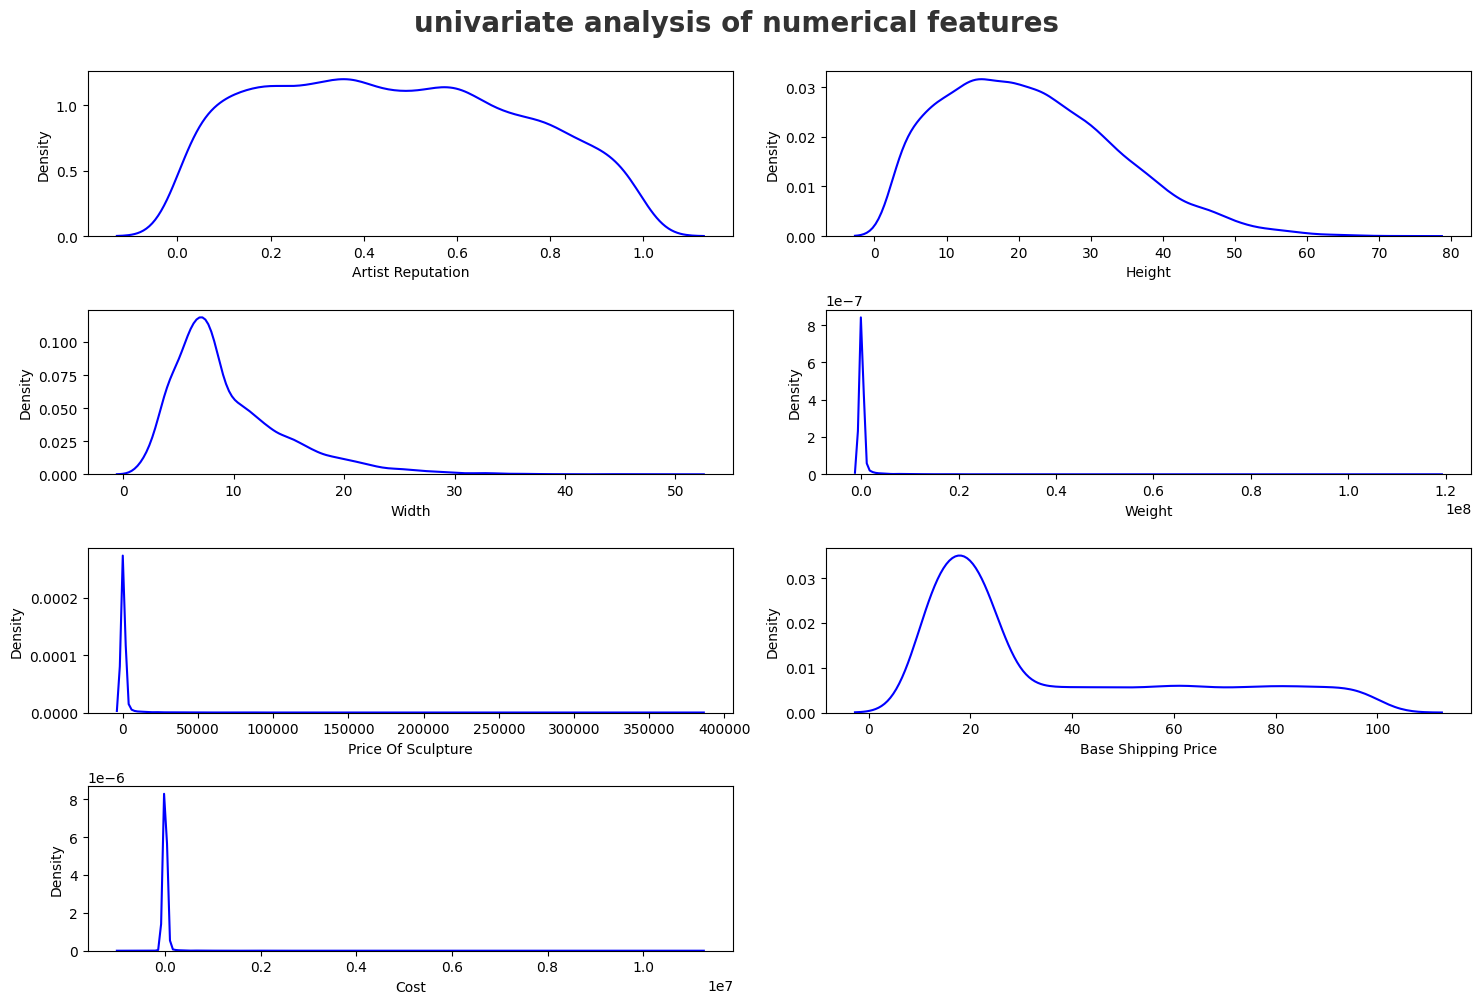

In [9]:
plt.figure(figsize=(15,10))
plt.suptitle('univariate analysis of numerical features',fontsize = 20,fontweight = 'bold',alpha = 0.8,y=1)

for i in range(0,len(numeric_features)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x = df[numeric_features[i]],color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Height, Width and Base Shipping Price are Positively Skewed
Cost and weight consists many outliers

In [10]:
categorical_columns = []
for i in categorical_features:
    print(f"{i}: {len(df[i].unique())}")
    if len(df[i].unique())<10:
        categorical_columns.append(i)

Customer Id: 10000
Artist Name: 9865
Material: 8
International: 2
Express Shipment: 2
Installation Included: 2
Transport: 4
Fragile: 2
Customer Information: 2
Remote Location: 3
Scheduled Date: 1697
Delivery Date: 1699
Customer Location: 9999
